<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


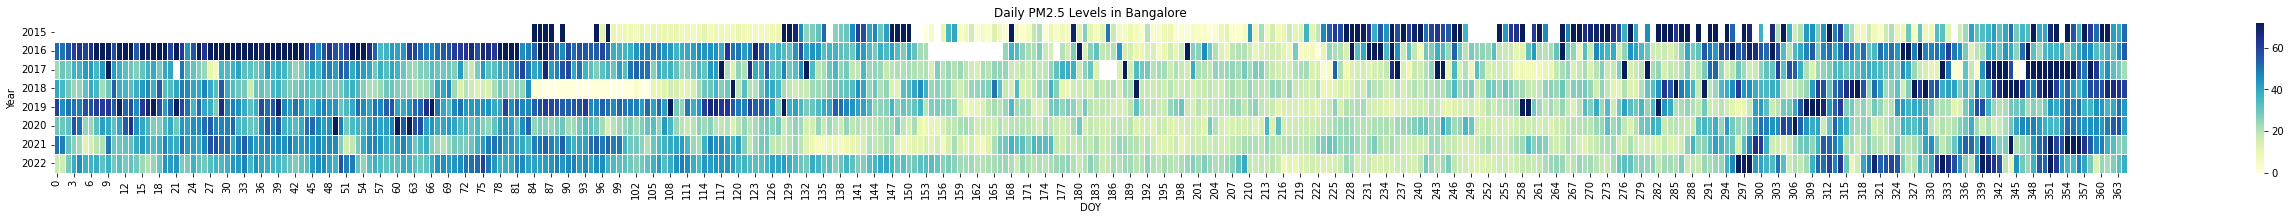

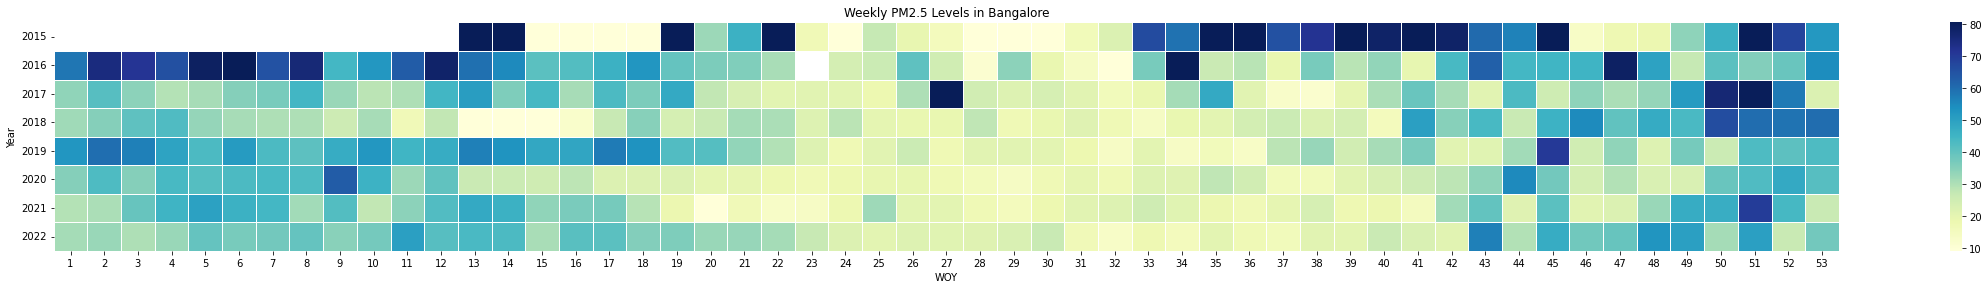

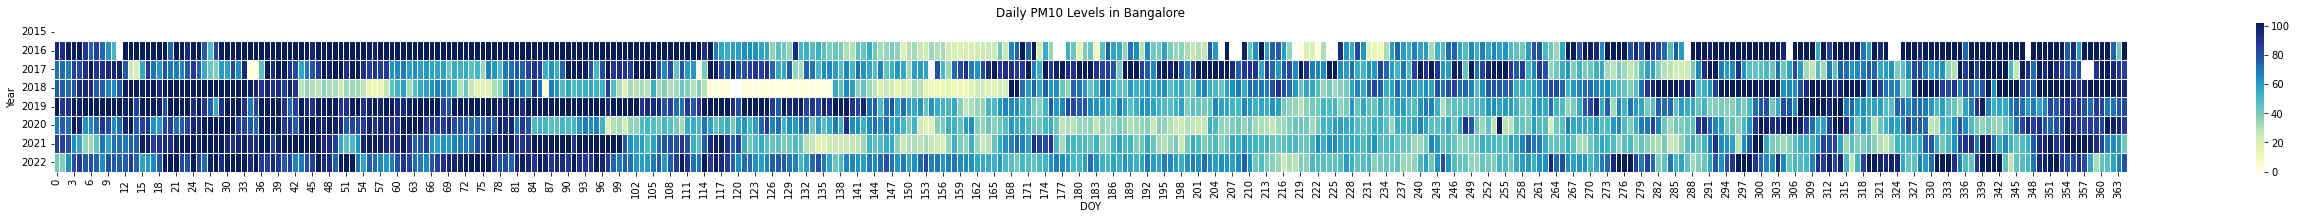

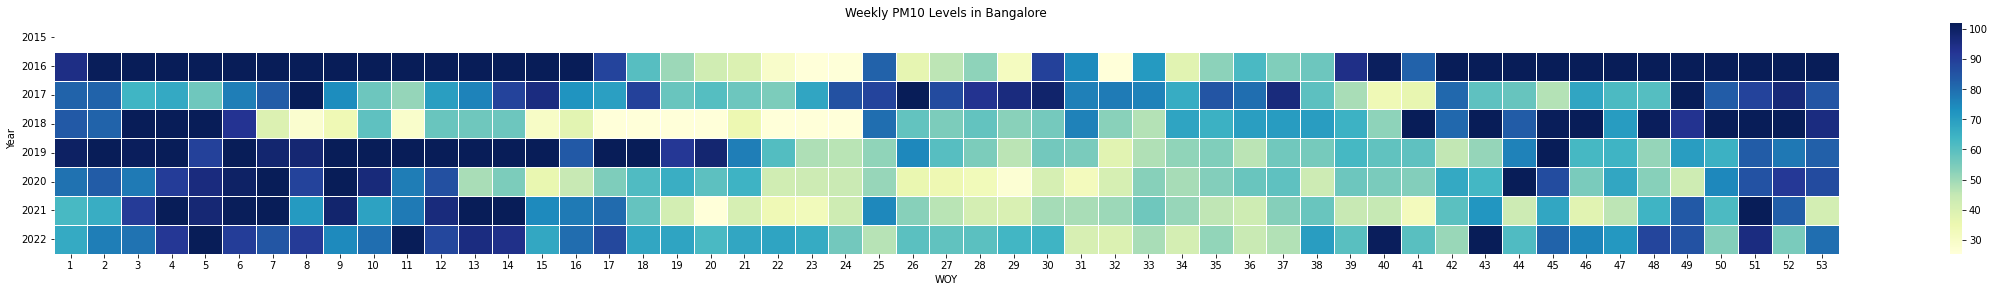

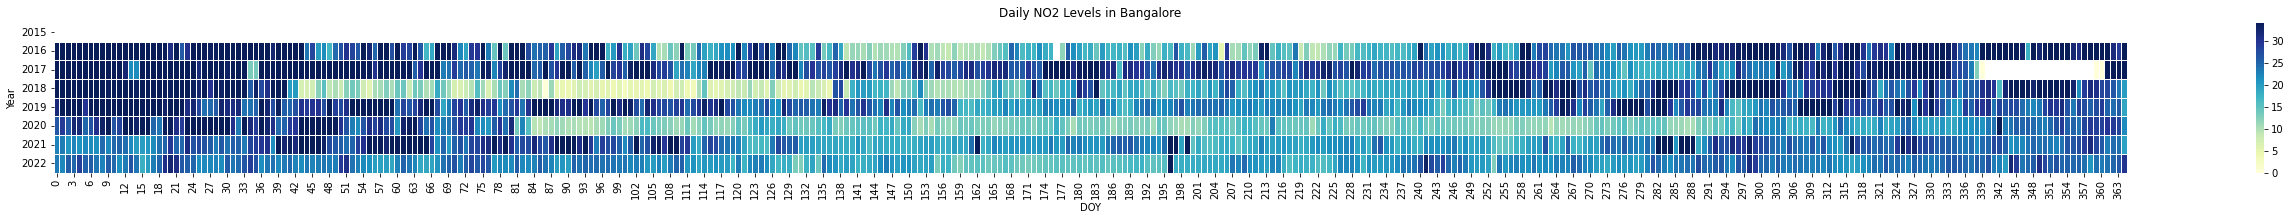

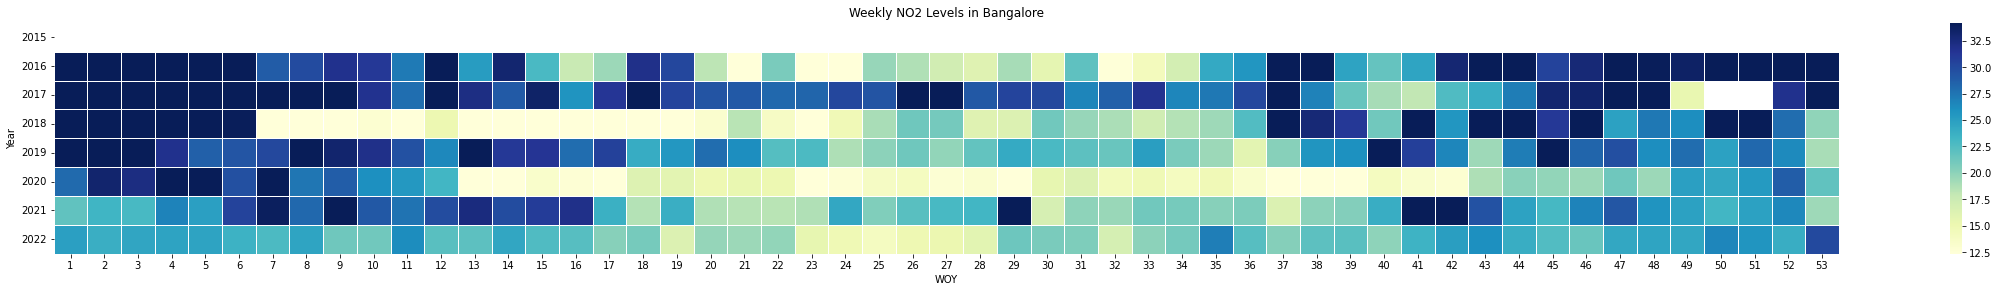

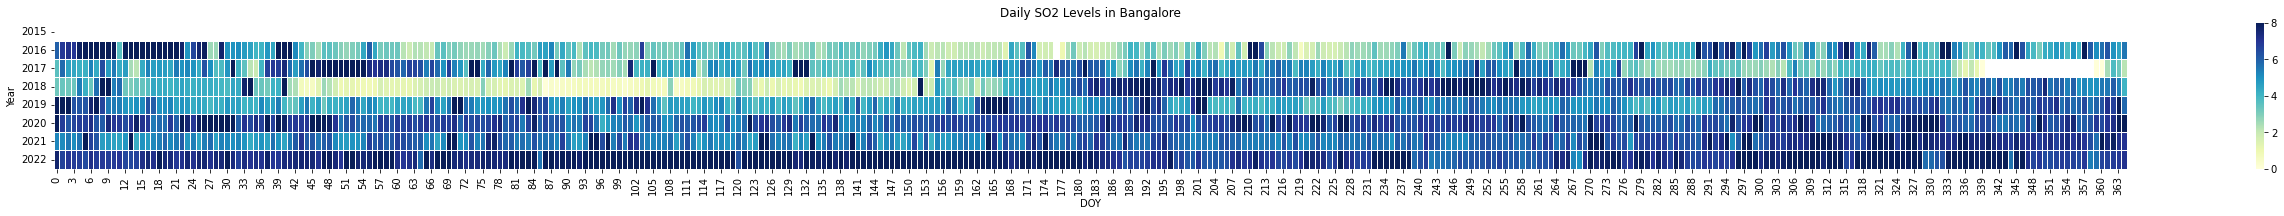

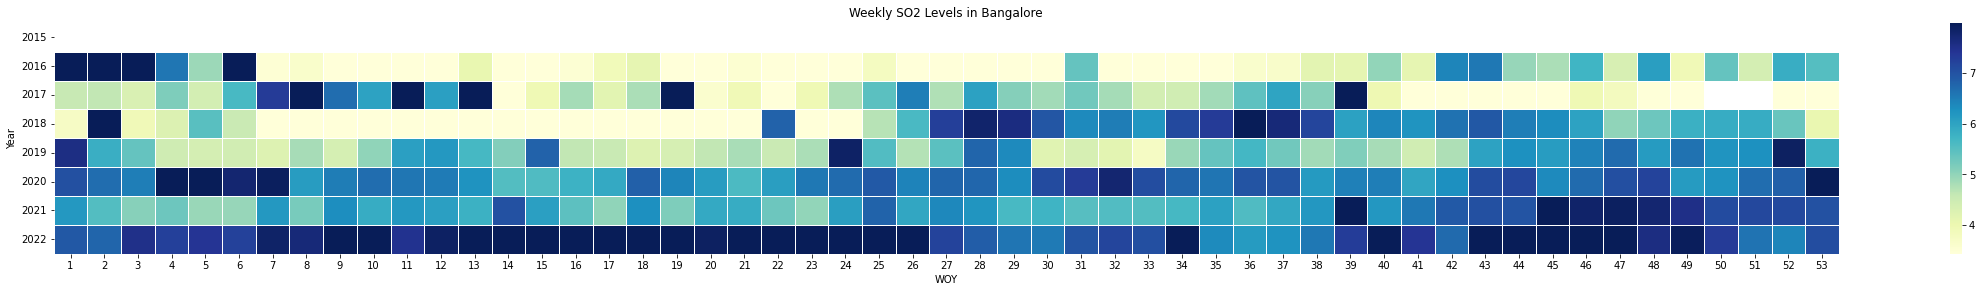

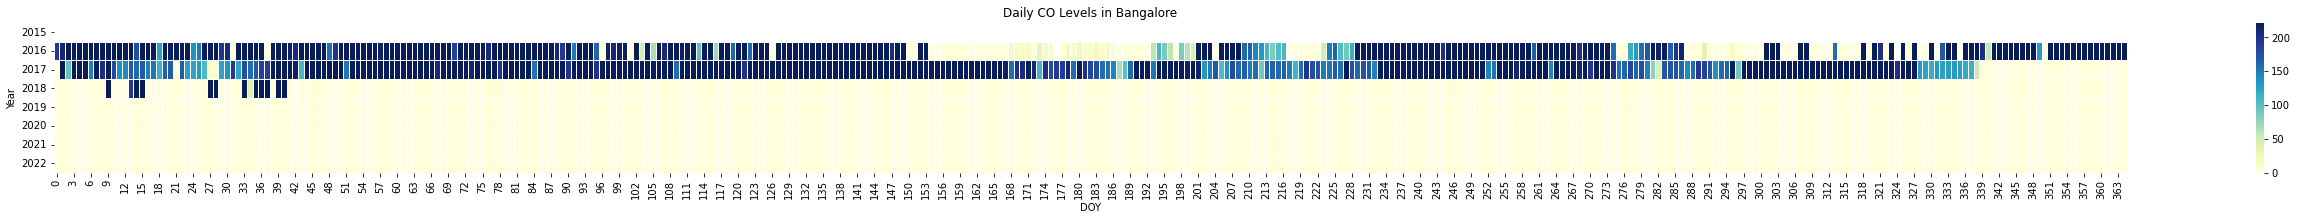

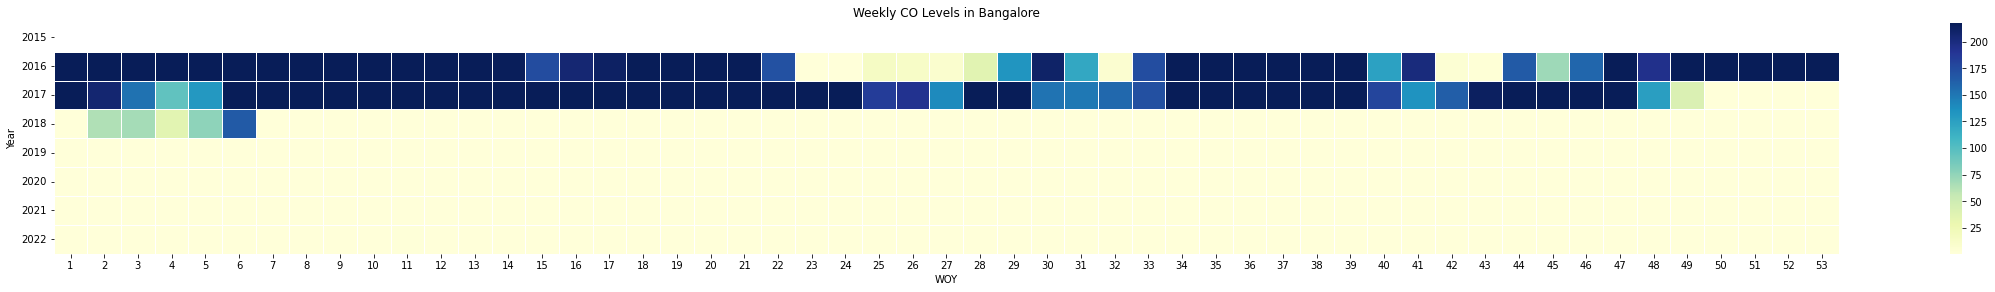

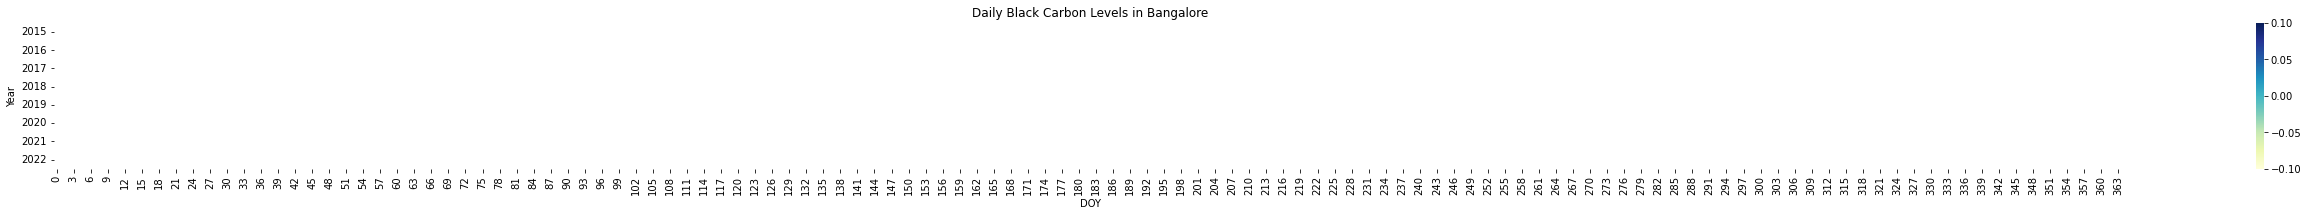

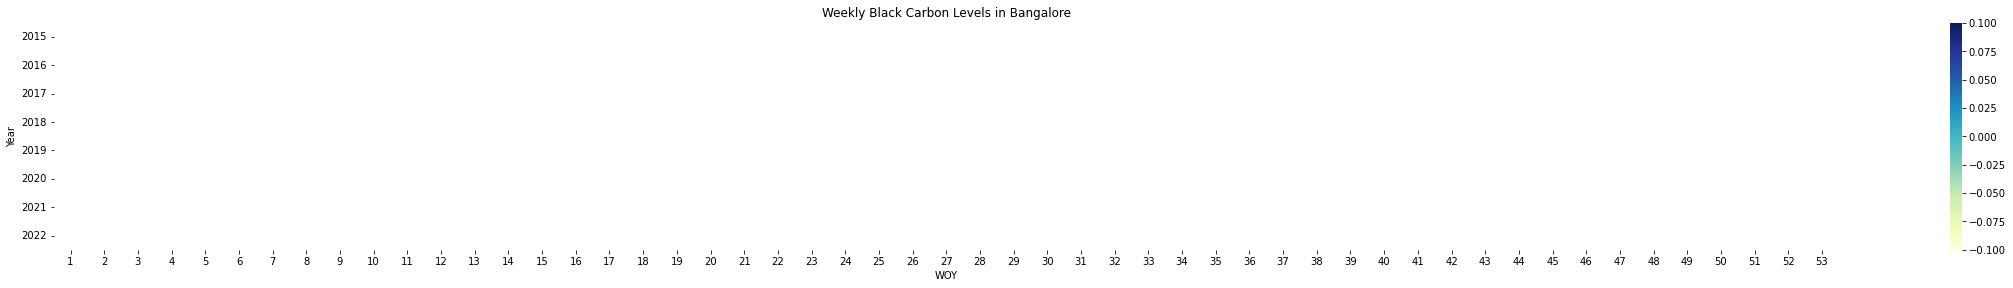

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import os
import numpy as np
# import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sys
# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
# current_working_directory
# Get the list of all files and directories
path = current_working_directory
dir_list0 = []
for x in os.listdir(path):
    if x.endswith(".xlsx"):
        dir_list0.append(x)
# adjust_date(dir_list0,'CO')
# dir_list0
# Define an empty list for years
yr_list = []
# This part of the code pulls apart the original file and converts them into multiple files for individual station
for i in range(0,len(dir_list0)):
    df = pd.read_excel(os.path.join(current_working_directory,dir_list0[i]))
    yr = int(df['Unnamed: 1'][6][6:10])
    # print(yr)
    yr_list.append(yr)
    df = df[10:]
    n=0
    
    if (yr % 400 == 0) and (yr % 100 == 0):
        l = 368
    elif (yr % 4 ==0) and (yr % 100 != 0):
        l = 368
    else:
        l = 367

    while n+l<=len(df):
        df0 = df[n:n+l]
        name = df0.iloc[0][2]
        df0.columns = df0.iloc[1]
        df0 = df0[2:]
        df0.reset_index(inplace = True)
        df0 = df0.drop(['index','To Date'],axis=1)
        a=1
        while a<len(df0.columns):
            try:
                newpath = os.path.join(current_working_directory,df0.columns[a])
                os.makedirs(newpath)
            except:
                newpath = os.path.join(current_working_directory,df0.columns[a])

            df0[['From Date',df0.columns[a]]].to_excel(os.path.join(newpath,name+df0.columns[a]+dir_list0[i]))
            a = a+1

        # print(name)
        n = n + l
    
# yr_list
# Since this variable contains names of gasses it is obvious to name it that way
atmosphere = df0.columns[1:]
# atmosphere
# This function compiles all the station's data together
def compile_data(dir_list,g,new_working_directory):
    # global compiled_data_directory
    # Initialize an empty DataFrame to store the merged data
    merged_data = pd.DataFrame()
    
    for i in range(0,len(dir_list)):
        # Read the CSV file
        # path = 
        df = pd.read_excel(os.path.join(new_working_directory,dir_list[i]))
        
        # Drop the first column
        df = df.drop(df.columns[0], axis=1)
        
        # Rename the third column with the first four characters of the file name
        new_column_name = dir_list[i][0:4]  # Get the first four characters of the file name
        df = df.rename(columns={df.columns[1]: new_column_name})
        
        # Merge the dataframes using the "From Date" column as the common column
        if merged_data.empty:
            merged_data = df
        else:
            merged_data = pd.merge(merged_data, df, on="From Date")
    
    # Print the merged data
    # print(merged_data)
    name =  g + df['From Date'][0][6:10] + '.xlsx'
    merged_data = merged_data.replace("None", np.nan)
    merged_data['Mean'] = merged_data.iloc[:,1:].mean(axis=1)
    merged_data['STDEV'] = merged_data.iloc[:,1:].std(axis=1)
    
    try:
        working_directory = os.path.join(current_working_directory,'Compiled Data')
        os.makedirs(working_directory)
    except:
        working_directory = os.path.join(current_working_directory,'Compiled Data')

    # compiled_data_directory = 
    merged_data.to_excel(os.path.join(working_directory,name))
# Pun Intended
for gas in atmosphere:
    new_working_directory = os.path.join(current_working_directory,gas)
    # print(new_working_directory)

    path = new_working_directory
    dir_list0 = []
    for x in os.listdir(path):
        if x.endswith(".xlsx"):
            dir_list0.append(x)
    # adjust_date(dir_list0,'CO')
    # dir_list0
    dir_list1 = []
    for x in yr_list:
        for i in dir_list0:
            if str(x) in i:
                dir_list1.append(i)
        compile_data(dir_list1,gas,new_working_directory)


working_directory = os.path.join(current_working_directory,'Compiled Data')
# working_directory
# Creating a txt file that compiles all the basic needful statistics
filename = os.path.join(current_working_directory,"Result_Statistics.txt") 
# filename
f = open(filename, "x")
f.write("Now the file has more content!")
for gas in atmosphere:
    f.write('\n')
    f.write(gas)
    # print(working_directory)
    # Get the list of all files and directories
    path = working_directory
    dir_list2 = []
    for x in os.listdir(path):
        if x.endswith(".xlsx"):
                dir_list2.append(x)
    # adjust_date(dir_list0,'CO')
    # dir_list2
    # adjust_date(dir_list0,'CO')
    # dir_list0

    # print(dir_list2)

    dir_list3 = []
    for i in dir_list2:
        if gas in i:
            dir_list3.append(i)
        # compile_yearly_data(dir_list1)

    # print(dir_list3)
    
    merged_data = pd.DataFrame()
    
    for i in dir_list3:
        
        df = pd.read_excel(os.path.join(working_directory,i))
        
        ear = df['From Date'][0][6:10]
        
        # df.drop(df.columns[0:8], axis=1)
        df = df[['Unnamed: 0','Mean']]
        
        # new_column_name = i[0:4]  # Get the first four characters of the file name
        df = df.rename(columns={df.columns[1]: ear})
    
        # if new_column_name == '2016' or new_column_name == '2020':
        #     df = df.drop(59).reset_index(drop = True)
        #     print(new_column_name)
            
        # Merge the dataframes using the "From Date" column as the common column
        if merged_data.empty:
            merged_data = df
        else:
            merged_data = pd.merge(merged_data, df)
    
    # df
    # print(merged_data)
    merged_data = merged_data.drop(df.columns[0],axis=1)

    try:
        merged_doc_directory = os.path.join(current_working_directory,'Daily Data')
        os.makedirs(merged_doc_directory)
    except:
        merged_doc_directory = os.path.join(current_working_directory,'Daily Data')

    merged_data.to_excel(os.path.join(merged_doc_directory,gas+'.xlsx'))

    # merged_data = merged_data.drop('2015', axis=1)
    merged_year_list = merged_data.columns

    f.write(' Mean')
    for yr in merged_year_list:
        x = merged_data[yr].mean()
        f.write('\n')
        f.write(yr)
        f.write(' ')
        f.write(str(x))

    f.write('\n')

    f.write('Std. Dev.')
    for yr in merged_year_list:
        x = merged_data[yr].std()
        f.write('\n')
        f.write(yr)
        f.write(' ')
        f.write(str(x))
    
    # plotting the heatmap
    cmap = "YlGnBu"
    fig, ax = plt.subplots(figsize=(37,3))
    g = sn.heatmap(data=merged_data.T,
                    vmin= 0,
                    vmax=merged_data.mean().max(),
                    cmap = cmap,
                    linewidths=1,
                   linecolor="White",
                   ax = ax
                  )
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)

    filename1 = os.path.join(merged_doc_directory,f"Daily{gas}.png") 

    fig.tight_layout(pad=2)
    plt.title(f'Daily {gas} Levels in Bangalore')
    plt.ylabel('Year')
    plt.xlabel('DOY')  
    # displaying the plotted heatmap
    plt.savefig(filename1)

    ######
    ######
    ######

    try:
        merged_doc_directory = os.path.join(current_working_directory,'Weekly Data')
        os.makedirs(merged_doc_directory)
    except:
        merged_doc_directory = os.path.join(current_working_directory,'Weekly Data')

    # Define the start and end dates
    start_date = datetime(2019, 1, 1)
    end_date = datetime(2019, 12, 31)
    
    # Initialize an empty list to store the dates
    date_list = []
    
    # Create a loop to generate dates within the specified range
    current_date = start_date
    while current_date <= end_date:
        date_list.append(current_date)
        current_date += timedelta(days=1)
    
    df_dates = pd.DataFrame(date_list)
    # df_dates
    
    df = pd.merge(df_dates,merged_data,left_index=True, right_index=True)
    # df.replace(-9999, np.nan, inplace=True)
    df.set_index(0, inplace=True)
    # print(df)

    # Calculate the weekly mean while ignoring NaN values
    weekly_mean_df = df.resample('W-TUE', label='left', closed='left').mean()
    weekly_mean_df = weekly_mean_df.reset_index()
    weekly_mean_df.index = weekly_mean_df.index + 1
    weekly_mean_df = weekly_mean_df.drop([0],axis=1)
    
    weekly_mean_df.to_excel(os.path.join(merged_doc_directory,gas+'.xlsx'))
    # plotting the heatmap
    # cmap = "RdPu"
    # RdPu WD
    # YlGnBu main
    # YlOrRd SR
    fig, ax = plt.subplots(figsize=(32,4))
    g = sn.heatmap(data=weekly_mean_df.T,
                    vmin= weekly_mean_df.min().mean(),
                    vmax=weekly_mean_df.mean().max(),#result_df.max().max()
                    cmap = cmap,
                    linewidths=1,
                   linecolor="White",
                   ax = ax
                  )
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)

    filename2 = os.path.join(merged_doc_directory,f"Weekly{gas}.png")

    fig.tight_layout(pad=2)
    plt.title(f'Weekly {gas} Levels in Bangalore')
    plt.ylabel('Year')
    plt.xlabel('WOY')  
    # displaying the plotted heatmap
    plt.savefig(filename2)

    # weekly_mean_df.to_excel(rf"D:\Pollutant\03_ProjectFiles\CPCB\Weekly\Meteo_Data\{gas}_CPCB_DataSheet.xlsx")

f.close()